In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import src
from src import constants as C
import vis

FILE_IN = "data/final/pfam_domains_in_nmd_regions.tsv"

In [2]:
df = (
    pd.read_csv(FILE_IN, sep="\t")
    .replace({"region": C.NMD_REGIONS_DICT})
    .assign(region=lambda x: pd.Categorical(x["region"], C.REGION_LABELS, ordered=True))
    .assign(
        constraint=lambda x: pd.Categorical(
            x["constraint"], ["unconstrained", "constrained"], ordered=True
        ).rename_categories(str.capitalize)
    )
    .sort_values(["constraint", "region"])
    .check.head(3)
)

<h5 style='text-align: left'><span style='color:None; background-color:None'>First 3 rows</span></h5>

,enst,region,constraint,domain,overlap,region_size,proportion_overlap
4,ENST00000000412,NMD target,Unconstrained,Man-6-P_recep,511,511,1.0000
10,ENST00000001008,NMD target,Unconstrained,FKBP_C,516,1072,0.4813
16,ENST00000002125,NMD target,Unconstrained,Methyltransf_28,762,910,0.8374


Text(0, 0.5, 'Proportion overlap\nwith Pfam domain')

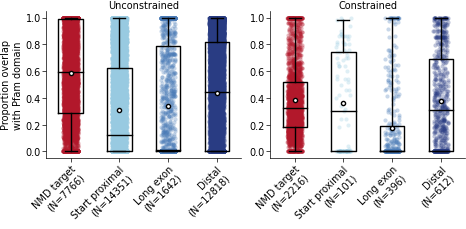

In [10]:
plt.style.use("src/visualisation/styles/default.mplstyle")

fig, axs = plt.subplots(1, 2, figsize=(12 / 2.54, 6 / 2.54), layout="constrained")

dfg_constraint = df.groupby("constraint", observed=True, sort=False)
region_colors = ["#B2182B", "#98CAE1", "#4A7BB7", "#293C83"]
for (name, data_constraint), ax in zip(dfg_constraint, axs):
    dfg_region = data_constraint.groupby("region", observed=True, sort=False)
    vis.plot.boxplot(dfg_region, "proportion_overlap", ax=ax, colors=region_colors)

    vis.utils.rotate_tick_labels("x", ax=ax)
    ax.set_title(name)

axs[0].set_ylabel("Proportion overlap\nwith Pfam domain")

